# Figure 3: Optogenetic nuclear depletion of SPT5 uncovers a highly sensitive window of embryogenesis


- [Figure 3 C: Adapt matrix for heatmap plotting](#1_adapt_deeptools_matrix)
- [Figure 3 D: TSS to TES scaled log2FC metaprofiles for 3-4h, 10-12h, 18-20h](#2_plot_scaled_metaprofiles)

### Figure 3 C: Adapt matrix for heatmap plotting <a class="anchor" id="1_adapt_deeptools_matrix"></a>
Take log2FC matrix and set bins to 0 after TES

In [1]:
import pandas as pd
import numpy as np
import gzip
from tqdm import tqdm  # For progress tracking

#############################################################
### Script for taking TSS centered deeptools heatmaps 
###     set bins to 0 after TES 
#############################################################

def process_matrix_single_log2FC(input_file, output_file):
    """
    Process a gene expression matrix by setting all values beyond the TES (Transcription End Site) to zero.
    
    Args:
        input_file (str): Path to the input .gz matrix file.
        output_file (str): Path to save the modified .gz matrix file.
    """
    # Open the .gz file and load the matrix
    with gzip.open(input_file, 'rt') as f:
        # Read the first line (header)
        header = f.readline().strip()
        
        # Load the remaining data into a DataFrame
        df = pd.read_csv(f, sep="\t", header=None)

    # Iterate over each gene (row) in the DataFrame
    for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing genes"):
        gene_start = int(row[1])  # Gene start position
        gene_end = int(row[2])    # Gene end position
        
        # Calculate the gene length
        gene_length = gene_end - gene_start
        
        # Calculate the TES position
        tes_position = gene_end
        
        # Determine the bin corresponding to the TES position (10 bp per bin)
        # Assumes positions are in bp, bins span -1000 bp to +5000 bp around TSS
        tes_bin_index = (gene_length + 1000) // 10

        # Set all values after the TES bin to 0 (bins after TES)
        if tes_bin_index < df.shape[1] - 6:  # Only affect bin columns
            df.iloc[index, tes_bin_index + 6:] = 0

    # Save the modified matrix to a new .gz file with the header
    with gzip.open(output_file, 'wt') as f_out:
        f_out.write(header + '\n')  # Write header to the output file
        df.to_csv(f_out, sep="\t", header=False, index=False)


def process_matrix_3h_comparison(input_file, output_file):
    """
    Process a 3-hour comparison matrix by setting all values beyond the TES to zero for both time points.

    Args:
        input_file (str): Path to the input .gz matrix file.
        output_file (str): Path to save the modified .gz matrix file.
    """
    # Open the .gz file and load the matrix
    with gzip.open(input_file, 'rt') as f:
        # Read the first line (header)
        header = f.readline().strip()
        
        # Load the remaining data into a DataFrame
        df = pd.read_csv(f, sep="\t", header=None)

    # Iterate over each gene (row) in the DataFrame
    for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing genes"):
        gene_start = int(row[1])  # Gene start position
        gene_end = int(row[2])    # Gene end position
        
        gene_length = gene_end - gene_start
        
        # Determine the bin corresponding to the TES position (10 bp per bin)
        tes_bin_index = (gene_length + 1000) // 10

        # Set values after the TES for both time points
        if tes_bin_index < 600:  # Only affect bin columns
            first_time_bin_start = tes_bin_index + 6
            first_time_bin_end = 6 + 600  

            # Set bins beyond TES to 0 for both time points
            df.iloc[index, first_time_bin_start:first_time_bin_end] = 0

    # Save the modified matrix to a new .gz file with the header
    with gzip.open(output_file, 'wt') as f_out:
        f_out.write(header + '\n')  # Write header to the output file
        df.to_csv(f_out, sep="\t", header=False, index=False)


matrix_paths_BL34_3h = "/scratch/dulja/SPT5_spikein_CUTnTag/Depletion_CUTnTag/depletion_heatmap_matrices/genes_active/grouped_sorted_TSS/heatmap_SPT5longLEXY_3-4h_3hdepletion.SPT5_plotting_Dark_vs_BlueLight_SpikedIn_log2FC.gz"
output_paths_BL34_3h = '/scratch/dulja/SPT5_spikein_CUTnTag/Depletion_CUTnTag/depletion_heatmap_matrices/genes_active/grouped_sorted_TSS/zero_after_TSS/heatmap_SPT5longLEXY_3-4h_3hdepletion.SPT5_plotting_Dark_vs_BlueLight_SpikedIn_log2FC_TES0.gz'
process_matrix_3h_comparison(matrix_paths_BL34_3h, output_paths_BL34_3h)


matrix_paths_BL1012_2h = "/scratch/dulja/SPT5_spikein_CUTnTag/Depletion_CUTnTag/depletion_heatmap_matrices/genes_active/grouped_sorted_TSS/heatmap_SPT5longLEXY_10-12h_2hdepletion.SPT5_plotting_Dark_vs_BlueLight_SpikedIn_log2FC.gz"
output_paths_BL1012_2h = '/scratch/dulja/SPT5_spikein_CUTnTag/Depletion_CUTnTag/depletion_heatmap_matrices/genes_active/grouped_sorted_TSS/zero_after_TSS/heatmap_SPT5longLEXY_10-12h_2hdepletion.SPT5_plotting_Dark_vs_BlueLight_SpikedIn_log2FC_TES0.gz'
process_matrix_3h_comparison(matrix_paths_BL1012_2h, output_paths_BL1012_2h)
    
matrix_path_BL1820_2h = "/scratch/dulja/SPT5_spikein_CUTnTag/Depletion_CUTnTag/depletion_heatmap_matrices/genes_active/grouped_sorted_TSS/heatmap_SPT5longLEXY_18-20h_2hdepletion.SPT5_plotting_Dark_vs_BlueLight_SpikedIn_log2FC.gz"
output_path_BL1820_2h = '/scratch/dulja/SPT5_spikein_CUTnTag/Depletion_CUTnTag/depletion_heatmap_matrices/genes_active/grouped_sorted_TSS/zero_after_TSS/heatmap_SPT5longLEXY_18-20h_2hdepletion.SPT5_plotting_Dark_vs_BlueLight_SpikedIn_log2FC_TES0.gz'
process_matrix_3h_comparison(matrix_path_BL1820_2h, output_path_BL1820_2h)

Processing genes: 100%|██████████| 10004/10004 [03:01<00:00, 55.10it/s]


Use the following deeptools commands to generate heatmaps: 

```bash
plotHeatmap \
	-m /scratch/dulja/SPT5_spikein_CUTnTag/Depletion_CUTnTag/depletion_heatmap_matrices/genes_active/grouped_sorted_TSS/zero_after_TSS/heatmap_SPT5longLEXY_3-4h_3hdepletion.SPT5_plotting_Dark_vs_BlueLight_SpikedIn_log2FC_TES0.gz \
	-out /g/furlong/project/92_SPT4_SPT5/Manuscript/Figures/Figure_3/Figure_3_C_BL3-4h_3hdepletion_SPT5.pdf \
        --plotType lines  --samplesLabel "BL34 3h" \
        --plotFileFormat pdf --legendLocation upper-right \
        --heatmapHeight 15 --heatmapWidth 8 --xAxisLabel ""\
        --yAxisLabel "" --sortUsing region_length --sortRegions ascend \
        --colorMap seismic --zMin -1.5 --zMax 1.5 --yMin -1.5 --yMax 1.5  --linesAtTickMarks   \
        --regionsLabel "Active genes" 
```

```bash
plotHeatmap \
	-m /scratch/dulja/SPT5_spikein_CUTnTag/Depletion_CUTnTag/depletion_heatmap_matrices/genes_active/grouped_sorted_TSS/zero_after_TSS/heatmap_SPT5longLEXY_10-12h_2hdepletion.SPT5_plotting_Dark_vs_BlueLight_SpikedIn_log2FC_TES0.gz \
	-out /g/furlong/project/92_SPT4_SPT5/Manuscript/Figures/Figure_3/Figure_3_C_BL10-12h_2hdepletion_SPT5.pdf \
        --plotType lines  --samplesLabel "BL1012 2h" \
        --plotFileFormat pdf --legendLocation upper-right \
        --heatmapHeight 15 --heatmapWidth 8 --xAxisLabel ""\
        --yAxisLabel "" --sortUsing region_length --sortRegions ascend \
        --colorMap seismic --zMin -1.5 --zMax 1.5 --yMin -1.5 --yMax 1.5  --linesAtTickMarks   \
        --regionsLabel "Active genes" 
```

```bash
plotHeatmap \
	-m /scratch/dulja/SPT5_spikein_CUTnTag/Depletion_CUTnTag/depletion_heatmap_matrices/genes_active/grouped_sorted_TSS/zero_after_TSS/heatmap_SPT5longLEXY_18-20h_2hdepletion.SPT5_plotting_Dark_vs_BlueLight_SpikedIn_log2FC_TES0.gz \
	-out /g/furlong/project/92_SPT4_SPT5/Manuscript/Figures/Figure_3/Figure_3_C_BL18-20h_2hdepletion_SPT5.pdf \
        --plotType lines  --samplesLabel "BL1820 2h" \
        --plotFileFormat pdf --legendLocation upper-right \
        --heatmapHeight 15 --heatmapWidth 8 --xAxisLabel ""\
        --yAxisLabel "" --sortUsing region_length --sortRegions ascend \
        --colorMap seismic --zMin -1.5 --zMax 1.5 --yMin -1.5 --yMax 1.5  --linesAtTickMarks   \
        --regionsLabel "Active genes" 
```




### Figure 3 D: TSS to TES scaled log2FC metaprofiles for 3-4h, 10-12h, 18-20h <a class="anchor" id="2_plot_scaled_metaprofiles"></a>

52.225290508615615


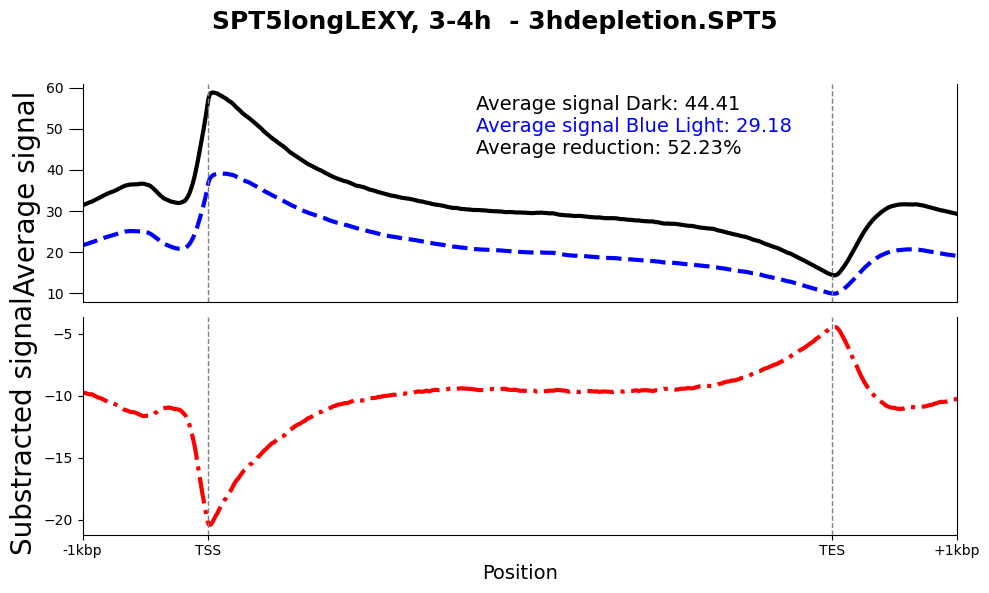

32.17050811622124


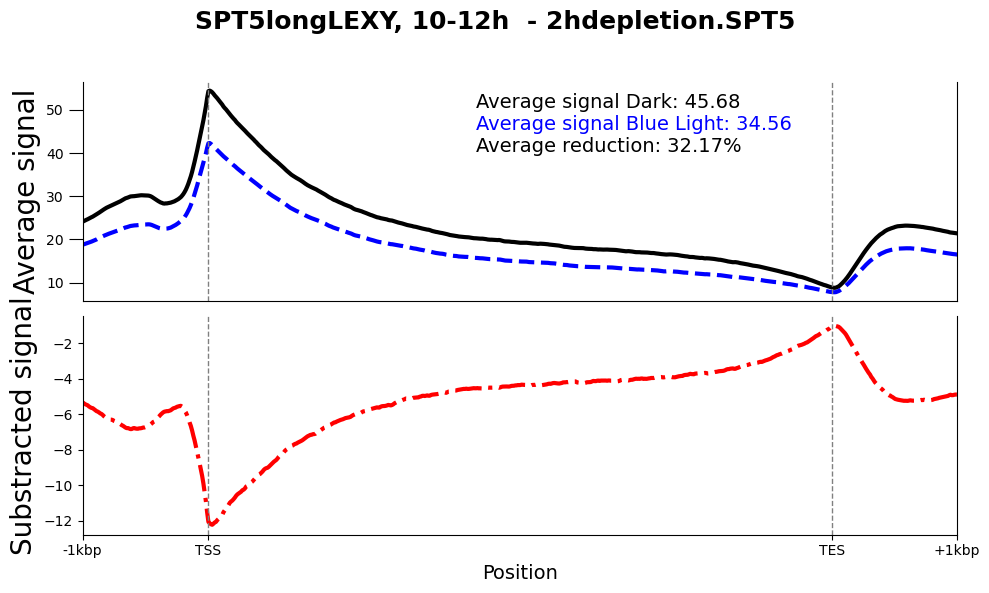

37.257005227304354


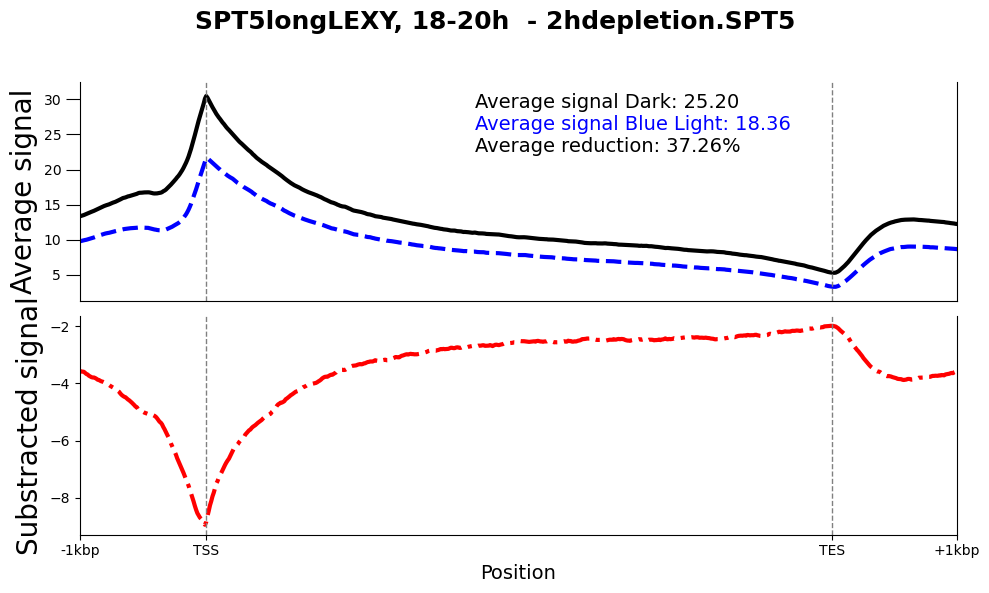

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import gzip
import json
import re
import os
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans' 

def load_matrix_data(matrix_path):
    """Load matrix data and header information from the gzipped file."""
    with gzip.open(matrix_path, 'rt') as f:
        header = f.readline()  # First line is the header

    header_data = json.loads(header.strip('@'))  # Remove '@' and parse JSON

    # Extract sample labels and boundaries
    sample_labels = header_data["sample_labels"]
    sample_boundaries = header_data["sample_boundaries"]

    # Load the actual matrix data
    matrix_df = pd.read_csv(matrix_path, sep='\t', compression='gzip', skiprows=1, header=None)

    return matrix_df, sample_labels, sample_boundaries


def split_samples(matrix_df, sample_labels, sample_boundaries):
    """Split the matrix into separate dataframes for Dark, Blue Light, and Log2FC."""
    # Extract the first six columns for gene metadata
    gene_metadata = matrix_df.iloc[:, :6]
    
    dark_df = pd.DataFrame()
    blue_light_df = pd.DataFrame()

    for i, sample in enumerate(sample_labels):
        start_idx = sample_boundaries[i]
        end_idx = sample_boundaries[i + 1] if i + 1 < len(sample_boundaries) else None
        # Split columns based on sample type
        if "Dark" in sample:
            dark_df = matrix_df.iloc[:, start_idx+6:end_idx+6]
        elif "BlueLight" in sample:
            blue_light_df = matrix_df.iloc[:, start_idx+6:end_idx+6]

    # Assign column names for clarity
    dark_df.columns = [f'{i}' for i in range(dark_df.shape[1])]
    blue_light_df.columns = [f'{i}' for i in range(blue_light_df.shape[1])]


    return dark_df, blue_light_df

def extract_time_range_from_path(matrix_path):
    """
    Extract the time range (e.g., '18-20h') from the matrix path.
    """
    match = re.search(r'(\d{1,2}-\d{1,2}h)', matrix_path)
    if match:
        return match.group(1)
    return "Unknown"

def extract_title_from_filename(matrix_path):
    """Extract and format the plot title from the matrix file path."""
    filename = os.path.basename(matrix_path)
    parts = filename.split('_')
    time_point = parts[1]   # time of depletion eg.: '18-20h'
    depletion = parts[2]    # duration of depletion eg.: '4hdepletion'
    antibody = parts[3]     # antibody eg.: 'SPT5' 
    formatted_depletion = depletion.replace('depletion', 'depletion').replace('h', 'h ')
    final_title = f'{time_point}, {formatted_depletion} - {antibody}'
    return final_title

def plot_data(dark_avg, blue_light_avg_1h, delta_avg, output_path, plot_title, dark_avg_TSS_TES, blue_light_avg_TSS_TES, delta_avg_avg_TSS_TES, plotting):
    """Plot the averaged data in two subplots, with Deltas on top, and save the figure."""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
    
    x = range(len(dark_avg))
    line_width = 3
    frontSize_add = -2

    # First subplot (top): Dark, Blue Light 1h, and Blue Light 3h
    ax1.plot(x, dark_avg, label='Dark', color='black', linestyle='-', linewidth=line_width)
    ax1.plot(x, blue_light_avg_1h, label='Blue Light 1h', color='blue', linestyle='--', linewidth=line_width, markeredgecolor='black')
    ax1.set_ylabel('Average signal', fontsize=22 + frontSize_add)
    
    percentage_reduction = delta_avg_avg_TSS_TES #((dark_avg_TSS_TES - blue_light_avg_TSS_TES) / dark_avg_TSS_TES) * 100
    
    # Add text annotations for dark_avg_TSS_TES and blue_light_avg_TSS_TES
    ax1.text(0.45, 0.95, f'Average signal Dark: {dark_avg_TSS_TES:.2f}', color='black', fontsize=14, ha='left', va='top', transform=ax1.transAxes)
    ax1.text(0.45, 0.85, f'Average signal Blue Light: {blue_light_avg_TSS_TES:.2f}', color='blue', fontsize=14, ha='left', va='top', transform=ax1.transAxes)
    ax1.text(0.45, 0.75, f'Average reduction: {percentage_reduction:.2f}%', color='black', fontsize=14, ha='left', va='top', transform=ax1.transAxes)

    y_min = min(min(dark_avg), min(blue_light_avg_1h)) - 2
    y_max = max(max(dark_avg), max(blue_light_avg_1h)) + 2
    ax1.set_ylim(y_min, y_max)
    #ax1.set_ylim(0, plotting)

    
    ax1.set_xticks([0, 100, 596, 695]) #199, 298, 397, 496,
    ax1.set_xticklabels(['-1kbp', 'TSS', 'TES', '+1kbp'], fontsize=20 + frontSize_add) 
    

    # Set tick size for both x and y axis (length adjusts the tick size)
    ax1.tick_params(axis='x', length=0)  # Adjust length to your desired size
    ax1.tick_params(axis='y', length=10)  # Adjust length to your desired size
    
    # Add TSS and TES lines across both subplots
    ax1.axvline(x=100, color='grey', linestyle='--', linewidth=1)  # TSS center
    ax1.axvline(x=596, color='grey', linestyle='--', linewidth=1)  # TES center
    
    ax1.set_xlim(0, 695)
    
    
    # Second subplot (bottom): Delta 1h, and Delta 3h
    ax2.plot(x, delta_avg, label='Delta (BL 3h - Dark)', color='red', linestyle='-.', linewidth=line_width, markeredgecolor='black')
    ax2.tick_params(axis='y', labelsize=10)
    ax2.axvline(x=100, color='grey', linestyle='--', linewidth=1)  # TSS center
    ax2.axvline(x=596, color='grey', linestyle='--', linewidth=1)  # TES center
    ax2.set_ylabel('Substracted signal', fontsize=22 + frontSize_add)
    ax2.set_xlim(0, 695)
    #ax2.set_ylim(22, 40)
    ax2.set_xlabel('Position', fontsize=16 + frontSize_add)
        

    # Adjust appearance
    fig.patch.set_facecolor('white')
    ax1.set_facecolor('white')
    ax1.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    
    # Add title above the subplots
    fig.suptitle(plot_title, fontsize=18, fontweight='bold')

    # Save plot
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to leave space for title
    plt.savefig(output_path)
    plt.show()
    plt.close()


def plot_SPT5_metaprofile(matrix_path_1h, output_path, plotting):
    # Load data for 1h matrix
    matrix_df_1h, sample_labels_1h, sample_boundaries_1h = load_matrix_data(matrix_path_1h)
    dark_df_1h, blue_light_df_1h = split_samples(matrix_df_1h, sample_labels_1h, sample_boundaries_1h)

    # Durchschnitt nur für Werte ohne NaN berechnen
    dark_avg = dark_df_1h.apply(lambda col: np.nanmean(col), axis=0)
    blue_light_avg_1h = blue_light_df_1h.apply(lambda col: np.nanmean(col), axis=0)
    
    delta_df = blue_light_df_1h - dark_df_1h
    delta_avg = delta_df.apply(lambda col: np.nanmean(col), axis=0)

    # Extract title from first matrix
    plot_title = extract_title_from_filename(matrix_path_1h)
    
    
    # Calculate average signal for bins 0-200 and 500-700 for both dark and blue light
    dark_avg_0_200 = dark_df_1h.iloc[:, 0:201].apply(lambda col: np.nanmean(col), axis=0).mean()  # Average for bins 0-200
    dark_avg_500_700 = dark_df_1h.iloc[:, 500:701].apply(lambda col: np.nanmean(col), axis=0).mean()  # Average for bins 500-700
    dark_avg_TSS_TES = dark_df_1h.iloc[:, 100:601].apply(lambda col: np.nanmean(col), axis=0).mean()  
    dark_avg_TSS_TES_1kbp = dark_df_1h.iloc[:, :].apply(lambda col: np.nanmean(col), axis=0).mean()  
    
    blue_light_avg_0_200 = blue_light_df_1h.iloc[:, 0:201].apply(lambda col: np.nanmean(col), axis=0).mean()
    blue_light_avg_500_700 = blue_light_df_1h.iloc[:, 500:701].apply(lambda col: np.nanmean(col), axis=0).mean()
    blue_light_avg_TSS_TES = blue_light_df_1h.iloc[:, 100:601].apply(lambda col: np.nanmean(col), axis=0).mean()  
    blue_light_avg_TSS_TES_1kbp = blue_light_df_1h.iloc[:, :].apply(lambda col: np.nanmean(col), axis=0).mean()  
     
    delta_avg_avg_0_200 = np.nanmean(delta_avg[0:201])
    delta_avg_avg_500_700 = np.nanmean(delta_avg[500:701])
    delta_avg_avg_TSS_TES = np.nanmean(delta_avg[100:601])
    delta_avg_avg_TSS_TES_1kbp = np.nanmean(delta_avg[:])
    
    # Extract title from the matrix path
    time_range = extract_time_range_from_path(matrix_path_1h)
    
    # Minimum für Dark und Blue Light berechnen (ignoriere NaN-Werte)
    dark_min = np.nanmin(dark_avg)
    blue_light_min = np.nanmin(blue_light_avg_1h)
    dark_max = np.nanmax(dark_avg)
    blue_light_max = np.nanmax(blue_light_avg_1h)

    dark_range = dark_max - dark_min
    blue_light_range = blue_light_max - blue_light_min
    depletion = ((dark_range / blue_light_range) - 1) * 100
    print(depletion)

    # Plot data
    plot_data(dark_avg, blue_light_avg_1h, delta_avg, 
              output_path, plot_title, 
              dark_range, blue_light_range, depletion, #dark_avg_TSS_TES, blue_light_avg_TSS_TES, delta_avg_avg_TSS_TES,
              plotting)
    

    

    return 
    
plot_dir = "/g/furlong/project/92_SPT4_SPT5/Manuscript/Figures/Figure_3/"
matrix_dir = "/home/mayer/92_SPT4_SPT5/Depletion_CUTnTag/analysis/depletion_heatmap/genes_active/grouped_sorted_center/"

# SPT5 BL3-4h, 3h
matrix_path_SPT5_BL34 = matrix_dir + "heatmap_SPT5longLEXY_3-4h_3hdepletion.SPT5_plotting_Dark_vs_BlueLight_SpikedIn.gz"
output_path_SPT5_BL34 = plot_dir + "Figure_3_D_BL3-4h_3hdepletion_SPT5_metaprofile.pdf"

plot_SPT5_metaprofile(matrix_path_SPT5_BL34, output_path_SPT5_BL34, plotting=60)


# SPT5 BL10-12h, 2h
matrix_path_SPT5_BL1012 = matrix_dir + "heatmap_SPT5longLEXY_10-12h_2hdepletion.SPT5_plotting_Dark_vs_BlueLight_SpikedIn.gz"
output_path_SPT5_BL1012 = plot_dir + "Figure_3_D_BL10-12h_2hdepletion_SPT5_metaprofile.pdf"

plot_SPT5_metaprofile(matrix_path_SPT5_BL1012, output_path_SPT5_BL1012, plotting=60)

# SPT5 BL18-20h, 2h
matrix_path_SPT5_BL1820 = matrix_dir + "heatmap_SPT5longLEXY_18-20h_2hdepletion.SPT5_plotting_Dark_vs_BlueLight_SpikedIn.gz"
output_path_SPT5_BL1820 = plot_dir + "Figure_3_D_BL18-20h_2hdepletion_SPT5_metaprofile.pdf"

plot_SPT5_metaprofile(matrix_path_SPT5_BL1820, output_path_SPT5_BL1820, plotting=35)
